In [171]:
import pandas as p
import matplotlib.pyplot as plt
excel = p.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQqg9EqbAHLj8bEiqbkxRWbg-TT0ixAWAzN4S20pwV0zVfuFW_Sx6H6ng_ac9TBrFVNJxhOTsBIL2rx/pub?gid=1665200568&single=true&output=csv")

def generar_tabla_frecuencias(nombre, nuevo_nombre):
    excel.rename(columns={nombre : nuevo_nombre}, inplace=True)
    frecuencia = excel.groupby(nuevo_nombre).agg(frequency=(nuevo_nombre, "count"))
    frecuencia.rename(columns={"frequency": "Frecuencia absoluta"}, inplace=True)
    frecuencia["Frecuencia absoluta acumulada"] = frecuencia["Frecuencia absoluta"].cumsum()
    frecuencia["Frecuencia relativa (%)"] = (frecuencia["Frecuencia absoluta"] / frecuencia["Frecuencia absoluta"].sum()) * 100
    frecuencia["Frecuencia relativa acumulada (%)"] = frecuencia["Frecuencia relativa (%)"].cumsum()

    if nuevo_nombre == "Experiencia":
        fila_faltante = p.Series(["Mala", 0, 0, 0, 0], index=["Categoría", "Frecuencia absoluta", "Frecuencia absoluta acumulada", "Frecuencia relativa (%)", "Frecuencia relativa acumulada (%)"])
        frecuencia.loc["Mala"] = fila_faltante


    # Suma el total de las frecuencias absoluta
    total_frecuencia_absoluta = frecuencia["Frecuencia absoluta"].sum()

    # Suma el total de las frecuencias relativas
    total_frecuencia_relativa = frecuencia["Frecuencia relativa (%)"].sum()

    nueva_fila = p.Series(["Total", total_frecuencia_absoluta, '-', total_frecuencia_relativa, '-'], index=["Categoría", "Frecuencia absoluta", "Frecuencia absoluta acumulada", "Frecuencia relativa (%)", "Frecuencia relativa acumulada (%)"])
    frecuencia.loc["Total"] = nueva_fila

    return frecuencia

def generar_grafica_barras(tabla_frecuencia, titulo, descripcion_xlabel):
    tabla_frecuencia[tabla_frecuencia.index != 'Total'].plot(kind='bar', y='Frecuencia absoluta', color='skyblue', legend=False, width=0.8)
    
    # Configurar el título y las etiquetas de los ejes
    plt.title(titulo)
    plt.xlabel(descripcion_xlabel)
    plt.ylabel('Frecuencia')

    # Mostrar el gráfico
    plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas del eje x para mayor legibilidad
    plt.tight_layout()  # Ajustar el diseño del gráfico
    plt.show()

def generar_grafico_pastel(tabla_frecuencia, titulo):
    if 'Total' in tabla_frecuencia.index:
        tabla_frecuencia = tabla_frecuencia[tabla_frecuencia.index != "Total"]

    plt.figure(figsize=(6, 6))
    plt.pie(tabla_frecuencia["Frecuencia absoluta"], labels=tabla_frecuencia.index, autopct='%1.1f%%', startangle=140)
    plt.title(titulo)
    plt.axis('equal')
    plt.show()

# ¿Qué clasificación fue la última película que viste?

In [172]:
tabla = generar_tabla_frecuencias("¿Qué clasificación fue la última película que viste?", "Clasificación")
tabla

,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa (%),Frecuencia relativa acumulada (%)
Clasificación,,,,
A,5,5,25.0,25.0
AA,4,9,20.0,45.0
B,8,17,40.0,85.0
C,2,19,10.0,95.0
D,1,20,5.0,100.0
Total,20,-,100.0,-


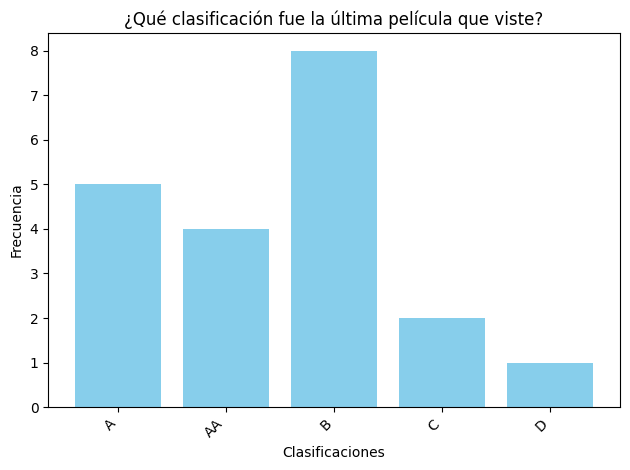

In [173]:
generar_grafica_barras(tabla, "¿Qué clasificación fue la última película que viste?", "Clasificaciones")

# ¿Qué tamaño eran tus palomitas?

In [174]:
tabla = generar_tabla_frecuencias("¿Qué tamaño eran tus palomitas?", "Tamaños de palomitas")
tabla

,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa (%),Frecuencia relativa acumulada (%)
Tamaños de palomitas,,,,
Chicas,3,3,15.0,15.0
Grandes,11,14,55.0,70.0
Medianas,3,17,15.0,85.0
Para llevar,3,20,15.0,100.0
Total,20,-,100.0,-


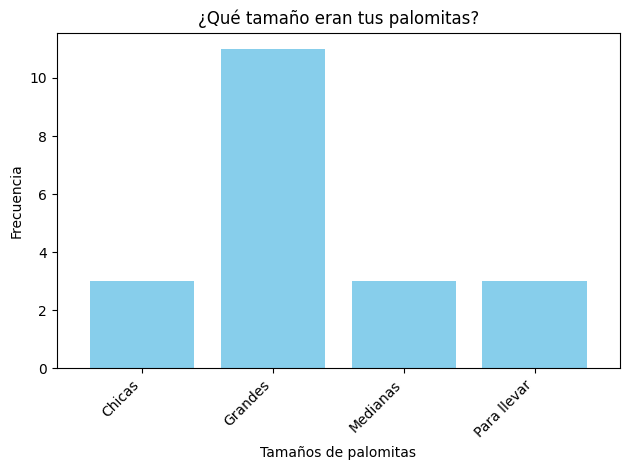

In [175]:
generar_grafica_barras(tabla, "¿Qué tamaño eran tus palomitas?", "Tamaños de palomitas")

# ¿Qué tamaño era tu refresco?

In [176]:
tabla = generar_tabla_frecuencias("¿Qué tamaño era tu refresco?", "Tamaños de refresco")
tabla

,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa (%),Frecuencia relativa acumulada (%)
Tamaños de refresco,,,,
Chico,3,3,15.0,15.0
Grande,8,11,40.0,55.0
Mediano,9,20,45.0,100.0
Total,20,-,100.0,-


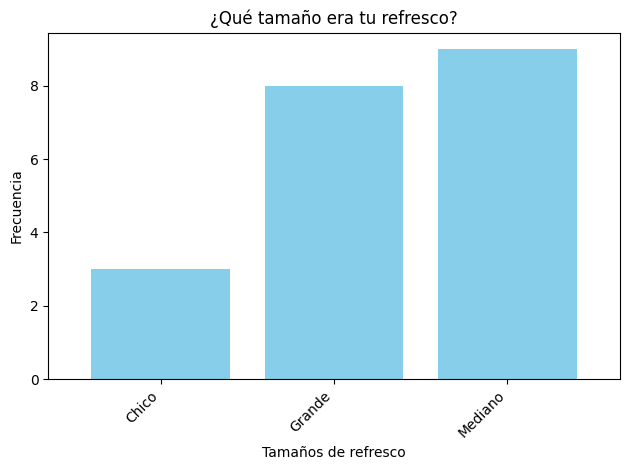

In [177]:
generar_grafica_barras(tabla, "¿Qué tamaño era tu refresco?", "Tamaños de refresco")

# ¿Cómo consideras que fue tu experiencia en el cine?

In [178]:
tabla = generar_tabla_frecuencias("¿Cómo consideras que fue tu experiencia en el cine?", "Experiencia")
tabla

,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa (%),Frecuencia relativa acumulada (%)
Experiencia,,,,
Buena,13,13,65.0,65.0
Excelente,6,19,30.0,95.0
Regular,1,20,5.0,100.0
Mala,0,0,0.0,0.0
Total,20,-,100.0,-


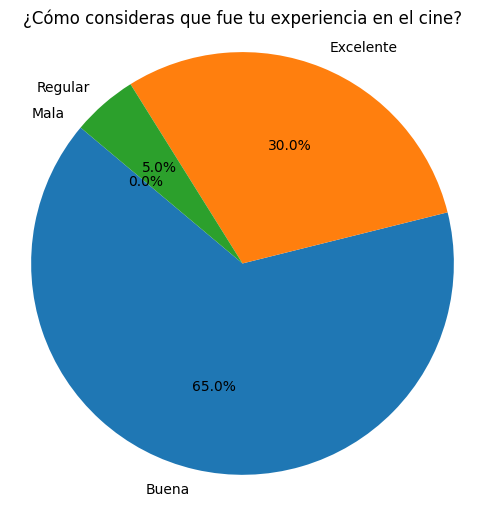

In [179]:
generar_grafico_pastel(tabla, "¿Cómo consideras que fue tu experiencia en el cine?")

# ¿A qué cine asististe?

In [180]:
tabla = generar_tabla_frecuencias("¿A qué cine asististe?", "Cines")
tabla

,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa (%),Frecuencia relativa acumulada (%)
Cines,,,,
Cinemex,10,10,50.0,50.0
Cinépolis,10,20,50.0,100.0
Total,20,-,100.0,-


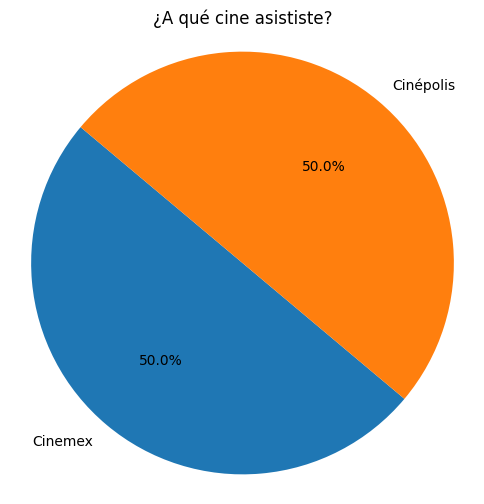

In [181]:
generar_grafico_pastel(tabla, "¿A qué cine asististe?")

# ¿Cómo calificas la película que viste?


In [182]:
tabla = generar_tabla_frecuencias("¿Cómo calificas la película que viste?", "Calificaciones")
tabla

,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa (%),Frecuencia relativa acumulada (%)
Calificaciones,,,,
Buena,14,14,70.0,70.0
Excelente,4,18,20.0,90.0
Mala,1,19,5.0,95.0
Regular,1,20,5.0,100.0
Total,20,-,100.0,-


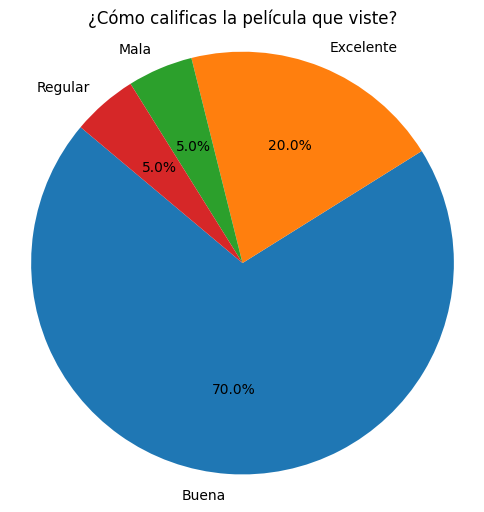

In [183]:
generar_grafico_pastel(tabla, "¿Cómo calificas la película que viste?")